# Exercise 1
In this notebook I will perform the exercises from the course using Python 3.

## Linear regression with one variable

Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. 
The chain already has trucks in various cities and you have data for
profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [37]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits import mplot3d

### Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). 

In [38]:
# import data
dat = pd.read_csv('ex1/ex1data1.txt',header=None)
dat.columns = ['population','profit']
dat.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'D')

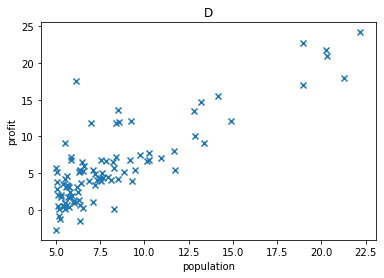

In [39]:
# plot data as scatterplot
plt.scatter(dat['population'],dat['profit'],marker='x')
plt.xlabel('population')
plt.ylabel('profit')
plt.title('D')

### Gradient Descent
Fit linear regression parameters $\theta$ to our dataset.

We add another dimension to our data to accommodate the
θ0 intercept term. We also initialize the initial parameters to 0 and the
learning rate alpha to 0.01.

In [40]:
# add a column of 1s to X (intercept)
X = np.array([np.ones(len(dat)),np.array(dat['population'])])
Y = np.array(dat['profit'])

# init fitting parameters
theta = np.zeros(2)

# convergence parameters
iterations = 1500
alpha = 0.01 # learning rate

- **Define function to compute the cost**: linear model and mean squared error

In [41]:
# function to calculate y of a linear model
def linear_model(x_values,pars):
    # linear model
    r = x_values[0]*pars[0]+ x_values[1]*pars[1]
    return r
    
# function to compute the cost
def compute_cost(x_values,pars,y_values):
    # calculate hypothesis model values (y') from x_values and init_par
    y_hypothesis = linear_model(x_values,pars)
    
    # compute unbiased mean squared error
    J = 1/(2*len(y_values))*sum((y_hypothesis-y_values)**2)
    return J

In [42]:
# confirm cost of 32.07
compute_cost(X,theta,Y)

32.072733877455654

- **Define function to update parameters simultaneously**:

In [43]:
# function to compute step gradient
def compute_gradient(x_values,pars,y_values,l_rate):
    # compute difference from linear model to y_values
    obs_er = (linear_model(x_values,pars)-y_values)
    
    # compute new theta values
    theta_new = pars - l_rate*(1/len(y_values))*obs_er.dot(np.transpose(x_values))
    return theta_new
    
# function for simultaneous parameter update
def gradient_descent(x_values,pars,y_values,l_rate,n_iterations):
    cost = []
    
    # compute and save cost
    cost.append(compute_cost(x_values,pars,y_values))
        
    pars_list = [pars]
    for i in range(n_iterations):
        # update parameters
        pars = compute_gradient(x_values,pars,y_values,l_rate)
        pars_list.append(pars)
        
        # compute and save cost
        cost.append(compute_cost(x_values,pars,y_values))
        
    return [cost,pars_list]

Text(0.5, 0, '$Iteration$')

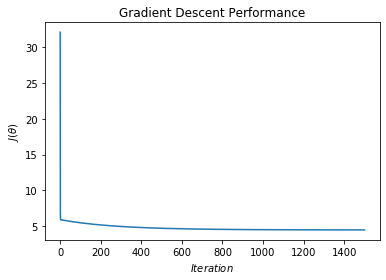

In [44]:
# perform gradient descent
gd_result = gradient_descent(X,theta,Y,alpha,iterations)

# visualize performance
plt.plot(gd_result[0])
plt.title('Gradient Descent Performance')
plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'$Iteration$')

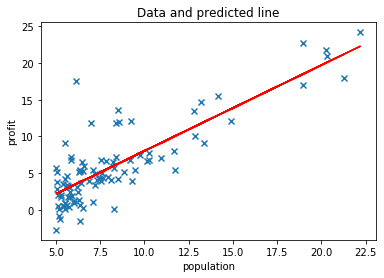

[-3.63029144  1.16636235]


In [45]:
# plot data as scatterplot with linear model
plt.scatter(dat['population'],dat['profit'],marker='x')
plt.plot(dat['population'],linear_model(X,gd_result[1][-1]),c='r')
plt.xlabel('population')
plt.ylabel('profit')
plt.title('Data and predicted line')
plt.show()

# print
print(gd_result[1][-1])

- **Visualize surface and contour plots of regression**

In [46]:
df = pd.DataFrame.from_dict({
    'cost_vals': gd_result[0],
    'theta_0': np.array(gd_result[1])[:,0],
    'theta_1': np.array(gd_result[1])[:,1]
})
df.head()

,cost_vals,theta_0,theta_1
0,32.072734,0.000000,0.000000
1,6.737190,0.058391,0.653288
2,5.931594,0.062892,0.770010
3,5.901155,0.057823,0.791348
4,5.895229,0.051064,0.795730


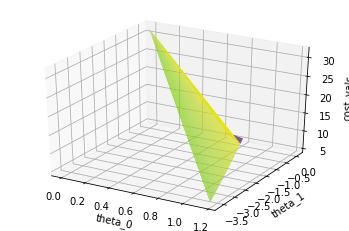

In [48]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf( df['theta_1'],df['theta_0'],df['cost_vals'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost_vals');
plt.show()

In [80]:
# Contour plot
x = np.linspace(-5,5,100)
y = np.linspace(0,1.5,100)
theta_0, theta_1 = np.meshgrid(x, y)

In [81]:
# compute costs for all meshgrid
Z = np.zeros(theta_0.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        tmp_pars = np.array([theta_0[i,j],theta_1[i,j]])
        Z[i,j] = compute_cost(np.array([np.ones(len(dat)),np.array(dat['population'])]),tmp_pars,dat['profit'])

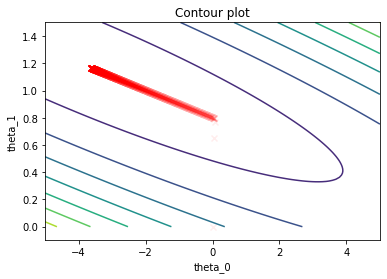

In [82]:
# contour
plt.contour(theta_0,theta_1,Z)
plt.scatter(gd_result[1][-1][0],gd_result[1][-1][1],c='r',marker='x')
# parameters trajectory
plt.scatter(df['theta_0'],df['theta_1'],c='r',marker='x',alpha=0.07)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.title('Contour plot')
plt.show()

## Linear regression with multiple variables